<a href="https://colab.research.google.com/github/esenkova/innopolis/blob/main/DZ_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [39]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [40]:
!wget -q https://mirror.linux-ia64.org/apache/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz

In [ ]:
!tar -xvf spark-3.0.3-bin-hadoop2.7.tgz

spark-3.0.3-bin-hadoop2.7/
spark-3.0.3-bin-hadoop2.7/NOTICE
spark-3.0.3-bin-hadoop2.7/kubernetes/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/python/Dockerfile
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/spark/Dockerfile
spark-3.0.3-bin-hadoop2.7/jars/
spark-3.0.3-bin-hadoop2.7/jars/jacks

In [41]:
!pip install -q findspark

In [42]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"

In [43]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

1, 2 задания

In [74]:
df=spark.read.csv('iris.csv', inferSchema=True, header=True)
df.count()
df.take(10)

[Row(sepal.length=5.1, sepal.width=3.5, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.9, sepal.width=3.0, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.7, sepal.width=3.2, petal.length=1.3, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.6, sepal.width=3.1, petal.length=1.5, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=5.0, sepal.width=3.6, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=5.4, sepal.width=3.9, petal.length=1.7, petal.width=0.4, variety='Setosa'),
 Row(sepal.length=4.6, sepal.width=3.4, petal.length=1.4, petal.width=0.3, variety='Setosa'),
 Row(sepal.length=5.0, sepal.width=3.4, petal.length=1.5, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.4, sepal.width=2.9, petal.length=1.4, petal.width=0.2, variety='Setosa'),
 Row(sepal.length=4.9, sepal.width=3.1, petal.length=1.5, petal.width=0.1, variety='Setosa')]

3 задание

In [104]:
df.groupBy().max('`sepal.length`').show()
df.groupBy().min('`sepal.length`').show()
df.groupBy().avg('`sepal.length`').show()

+-----------------+
|max(sepal.length)|
+-----------------+
|              7.9|
+-----------------+

+-----------------+
|min(sepal.length)|
+-----------------+
|              4.3|
+-----------------+

+-----------------+
|avg(sepal.length)|
+-----------------+
|5.843333333333335|
+-----------------+



In [105]:
df.groupBy().max('`sepal.width`').show()
df.groupBy().min('`sepal.width`').show()
df.groupBy().avg('`sepal.width`').show()

+----------------+
|max(sepal.width)|
+----------------+
|             4.4|
+----------------+

+----------------+
|min(sepal.width)|
+----------------+
|             2.0|
+----------------+

+-----------------+
| avg(sepal.width)|
+-----------------+
|3.057333333333334|
+-----------------+



In [110]:
df.groupBy().max('`petal.length`').show()
df.groupBy().min('`petal.length`').show()
df.groupBy().avg('`petal.length`').show()

+-----------------+
|max(petal.length)|
+-----------------+
|              6.9|
+-----------------+

+-----------------+
|min(petal.length)|
+-----------------+
|              1.0|
+-----------------+

+------------------+
| avg(petal.length)|
+------------------+
|3.7580000000000027|
+------------------+



In [111]:
df.groupBy().max('`petal.width`').show()
df.groupBy().min('`petal.width`').show()
df.groupBy().avg('`petal.width`').show()

+----------------+
|max(petal.width)|
+----------------+
|             2.5|
+----------------+

+----------------+
|min(petal.width)|
+----------------+
|             0.1|
+----------------+

+-----------------+
| avg(petal.width)|
+-----------------+
|1.199333333333334|
+-----------------+



4 задание

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

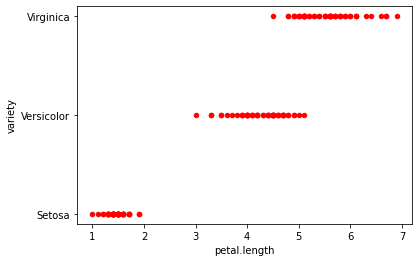

In [127]:
pd_df=df.toPandas()
pd_df.plot.scatter(x='petal.length', y='variety', c='r')

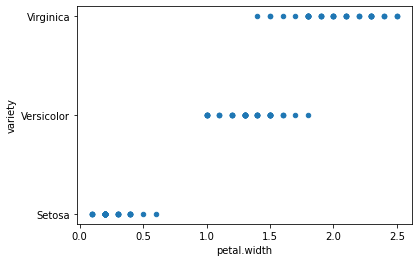

In [122]:
pd_df=df.toPandas()
pd_df.plot.scatter(x='petal.width', y='variety')

5, 6 задание
Если 'petal.length'<2,то Setosa

In [131]:
from pyspark.sql import functions as F

In [140]:
df_p=df.withColumn('prediction', F.when(F.col('`petal.length`')<2, F.lit('Setosa')).otherwise(F.lit('UNKNOWN')))
df_p.show()

+------------+-----------+------------+-----------+-------+----------+
|sepal.length|sepal.width|petal.length|petal.width|variety|prediction|
+------------+-----------+------------+-----------+-------+----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|    Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|    Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|    Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|    Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|    Setosa|
|         5.4|        3.9|         1.7|        0.4| Setosa|    Setosa|
|         4.6|        3.4|         1.4|        0.3| Setosa|    Setosa|
|         5.0|        3.4|         1.5|        0.2| Setosa|    Setosa|
|         4.4|        2.9|         1.4|        0.2| Setosa|    Setosa|
|         4.9|        3.1|         1.5|        0.1| Setosa|    Setosa|
|         5.4|        3.7|         1.5|        0.2| Setosa|    Setosa|
|     

7 задание

In [137]:
df_p.filter((F.col('prediction')=='Setosa') & (F.col('variety')=='Setosa')).count()

50

In [138]:
df_p.filter((F.col('prediction')=='Setosa') & (F.col('variety')!='Setosa')).count()

0